# SALINITY PREDICTION USING REGRESSION MODELLING

In this notebook we try predicting the water salinity levels based on various factors. The Kaggle dataset used is from the  California Cooperative Oceanic Fisheries Investigations representing the longest (1949-present) and most complete (more than 50,000 sampling stations) time series of oceanographic and larval fish data in the world. Link to the dataset is provied: [CalCOFI](https://www.kaggle.com/datasets/sohier/calcofi/data?select=bottle.csv)

### Importing the Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset

In [3]:
df = pd.read_csv(r"D:\Data Science Lectures\Data\bottle.csv", low_memory = False)
df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Wrangling

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [4]:
df.isnull().sum()

Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
                        ...  
TA1                    862779
TA2                    864629
pH2                    864853
pH1                    864779
DIC Quality Comment    864808
Length: 74, dtype: int64

In [5]:
df.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')

Since the dataset is large, we will use a sample of the data to for prediction

In [5]:
# Selecting 1500 samples of the data
df2 = df.iloc[:1500, :]

In [6]:
len(df2)

1500

In [8]:
df2.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We shall go ahead and deal with the null values and duplicate values

In [7]:
#Checking for columns with null values
df2.isnull().sum()

Cst_Cnt                   0
Btl_Cnt                   0
Sta_ID                    0
Depth_ID                  0
Depthm                    0
                       ... 
TA1                    1500
TA2                    1500
pH2                    1500
pH1                    1500
DIC Quality Comment    1500
Length: 74, dtype: int64

In [10]:
df2.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')

In [8]:
# Dropping Columns that have no values
df3 = df2.drop(columns = ['TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'])

In [9]:
df3.shape

(1500, 69)

In [10]:
df3.isnull().sum()

Cst_Cnt        0
Btl_Cnt        0
Sta_ID         0
Depth_ID       0
Depthm         0
            ... 
R_PHAEO     1500
R_PRES         0
R_SAMP      1500
DIC1        1500
DIC2        1500
Length: 69, dtype: int64

In [11]:
missing_data = df3.isnull()
missing_data.head(10)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2
0,False,False,False,False,False,False,False,True,False,True,...,True,True,True,True,True,True,False,True,True,True
1,False,False,False,False,False,False,False,True,False,True,...,True,True,True,True,True,True,False,True,True,True
2,False,False,False,False,False,False,False,True,False,True,...,True,True,True,True,True,True,False,True,True,True
3,False,False,False,False,False,False,False,True,False,True,...,True,True,True,True,True,True,False,True,True,True
4,False,False,False,False,False,False,False,True,False,True,...,True,True,True,True,True,True,False,True,True,True
5,False,False,False,False,False,False,False,True,False,True,...,True,True,True,True,True,True,False,True,True,True
6,False,False,False,False,False,False,False,True,False,True,...,True,True,True,True,True,True,False,True,True,True
7,False,False,False,False,False,False,False,True,False,True,...,True,True,True,True,True,True,False,True,True,True
8,False,False,False,False,False,False,False,True,False,True,...,True,True,True,True,True,True,False,True,True,True
9,False,False,False,False,False,False,False,True,False,True,...,True,True,True,True,True,True,False,True,True,True


In [12]:
# Printing the columns with more than 3/4 null values
missing_list = []
for column in missing_data:
    print(column)
    print(missing_data[column].value_counts())
    print("")
    if np.any((missing_data[column].value_counts().index[0] == True) and (missing_data[column].value_counts().values[0] >= 1420)):
        missing_list.append(column)

Cst_Cnt
Cst_Cnt
False    1500
Name: count, dtype: int64

Btl_Cnt
Btl_Cnt
False    1500
Name: count, dtype: int64

Sta_ID
Sta_ID
False    1500
Name: count, dtype: int64

Depth_ID
Depth_ID
False    1500
Name: count, dtype: int64

Depthm
Depthm
False    1500
Name: count, dtype: int64

T_degC
T_degC
False    1497
True        3
Name: count, dtype: int64

Salnty
Salnty
False    1466
True       34
Name: count, dtype: int64

O2ml_L
O2ml_L
True    1500
Name: count, dtype: int64

STheta
STheta
False    1463
True       37
Name: count, dtype: int64

O2Sat
O2Sat
True    1500
Name: count, dtype: int64

Oxy_µmol/Kg
Oxy_µmol/Kg
True    1500
Name: count, dtype: int64

BtlNum
BtlNum
True    1500
Name: count, dtype: int64

RecInd
RecInd
False    1500
Name: count, dtype: int64

T_prec
T_prec
False    1497
True        3
Name: count, dtype: int64

T_qual
T_qual
True     1486
False      14
Name: count, dtype: int64

S_prec
S_prec
False    1466
True       34
Name: count, dtype: int64

S_qual
S_qual
True     1

In [13]:
# Printing the Missing List
missing_list

['O2ml_L',
 'O2Sat',
 'Oxy_µmol/Kg',
 'BtlNum',
 'T_qual',
 'S_qual',
 'SThtaq',
 'ChlorA',
 'Phaeop',
 'PO4uM',
 'SiO3uM',
 'NO2uM',
 'NO3uM',
 'NH3uM',
 'C14As1',
 'C14A1p',
 'C14As2',
 'C14A2p',
 'DarkAs',
 'DarkAp',
 'MeanAs',
 'MeanAp',
 'IncTim',
 'LightP',
 'R_O2',
 'R_O2Sat',
 'R_SIO3',
 'R_PO4',
 'R_NO3',
 'R_NO2',
 'R_NH4',
 'R_CHLA',
 'R_PHAEO',
 'R_SAMP',
 'DIC1',
 'DIC2']

Since these columns have majority of the rows with missing values we shall drop these columns

In [14]:
# Drop the Columns with missing values
df4 = df3.drop(columns = missing_list)

In [15]:
df4.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,...,DarkAq,MeanAq,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_PRES
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,25.649,3,1.0,...,9.0,9.0,0.0,10.50,10.50,33.440,25.64,233.0,0.00,0
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,25.656,3,2.0,...,9.0,9.0,8.0,10.46,10.46,33.440,25.65,232.5,0.01,8
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,25.654,7,2.0,...,9.0,9.0,10.0,10.46,10.46,33.437,25.65,232.8,0.02,10
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,25.643,3,2.0,...,9.0,9.0,19.0,10.45,10.45,33.420,25.64,234.1,0.04,19
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,25.643,7,2.0,...,9.0,9.0,20.0,10.45,10.45,33.421,25.64,234.0,0.04,20


In [22]:
df4.isnull().sum()

Cst_Cnt        0
Btl_Cnt        0
Sta_ID         0
Depth_ID       0
Depthm         0
T_degC         3
Salnty        34
STheta        37
RecInd         0
T_prec         3
S_prec        34
P_qual         0
O_qual         0
O2Satq         0
Chlqua         0
Phaqua         0
PO4q           0
SiO3qu         0
NO2q           0
NO3q           0
NH3q           0
C14A1q         0
C14A2q         0
DarkAq         0
MeanAq         0
R_Depth        0
R_TEMP         3
R_POTEMP      46
R_SALINITY    34
R_SIGMA       64
R_SVA         64
R_DYNHT       31
R_PRES         0
dtype: int64

In [23]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Cst_Cnt     1500 non-null   int64  
 1   Btl_Cnt     1500 non-null   int64  
 2   Sta_ID      1500 non-null   object 
 3   Depth_ID    1500 non-null   object 
 4   Depthm      1500 non-null   int64  
 5   T_degC      1497 non-null   float64
 6   Salnty      1466 non-null   float64
 7   STheta      1463 non-null   float64
 8   RecInd      1500 non-null   int64  
 9   T_prec      1497 non-null   float64
 10  S_prec      1466 non-null   float64
 11  P_qual      1500 non-null   float64
 12  O_qual      1500 non-null   float64
 13  O2Satq      1500 non-null   float64
 14  Chlqua      1500 non-null   float64
 15  Phaqua      1500 non-null   float64
 16  PO4q        1500 non-null   float64
 17  SiO3qu      1500 non-null   float64
 18  NO2q        1500 non-null   float64
 19  NO3q        1500 non-null  

We still have columns with missing values, since the data values are all integers, we shall fill the missing values with the mean of the values in each column

In [24]:
df4.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'STheta', 'RecInd', 'T_prec', 'S_prec', 'P_qual', 'O_qual',
       'O2Satq', 'Chlqua', 'Phaqua', 'PO4q', 'SiO3qu', 'NO2q', 'NO3q', 'NH3q',
       'C14A1q', 'C14A2q', 'DarkAq', 'MeanAq', 'R_Depth', 'R_TEMP', 'R_POTEMP',
       'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_PRES'],
      dtype='object')

In [18]:
# Calculating the mean of each column with missing values
sal_mean = df4['Salnty'].mean()
stheta_mean = df4['STheta'].mean()
s_prec_mean = df4['S_prec'].mean()
pop_tem_mean = df4['R_POTEMP'].mean()
r_sal = df4['R_SALINITY'].mean()
r_sig = df4['R_SIGMA'].mean()
r_sva = df4['R_SVA'].mean()
t_deg = df4['T_degC'].mean()
t_prec = df4['T_prec'].mean()
r_temp = df4['R_TEMP'].mean()
rec_mean = df4['RecInd'].mean()
r_dhy = df4['R_DYNHT'].mean()

In [19]:
# Filling the missing values in each column
df4['Salnty'] = df4['Salnty'].replace(np.nan, sal_mean)
df4['STheta'] = df4['STheta'].replace(np.nan, stheta_mean)
df4['S_prec'] = df4['S_prec'].replace(np.nan, s_prec_mean)
df4['R_POTEMP'] = df4['R_POTEMP'].replace(np.nan, pop_tem_mean)
df4['R_SALINITY'] = df4['R_SALINITY'].replace(np.nan, r_sal)
df4['R_SIGMA'] = df4['R_SIGMA'].replace(np.nan, r_sig)
df4['R_SVA'] = df4['R_SVA'].replace(np.nan, r_sva)
df4['T_degC'] = df4['T_degC'].replace(np.nan, t_deg)
df4['T_prec'] = df4['T_prec'].replace(np.nan, t_prec)
df4['R_TEMP'] = df4['R_TEMP'].replace(np.nan, r_temp)
df4['RecInd'] = df4['RecInd'].replace(np.nan, rec_mean)
df4['R_DYNHT'] = df4['R_DYNHT'].replace(np.nan, r_dhy)

In [20]:
#Checking for null values
df4.isnull().sum()

Cst_Cnt       0
Btl_Cnt       0
Sta_ID        0
Depth_ID      0
Depthm        0
T_degC        0
Salnty        0
STheta        0
RecInd        0
T_prec        0
S_prec        0
P_qual        0
O_qual        0
O2Satq        0
Chlqua        0
Phaqua        0
PO4q          0
SiO3qu        0
NO2q          0
NO3q          0
NH3q          0
C14A1q        0
C14A2q        0
DarkAq        0
MeanAq        0
R_Depth       0
R_TEMP        0
R_POTEMP      0
R_SALINITY    0
R_SIGMA       0
R_SVA         0
R_DYNHT       0
R_PRES        0
dtype: int64

We have successfully dealt with the missing values. We shall then check if our dataset has any duplicated values

In [28]:
df4.duplicated().sum()

0

Our data is clean off duplicated values

### Exploratory Data Analysis

We shall perform a bit of EDA to get an insight on our data

In [21]:
# Dropping the string columns
df_c = df4.drop(columns = ['Sta_ID', 'Depth_ID'])

In [22]:
# Checking the Correlation of values in our data
df_c.corr()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,S_prec,P_qual,...,DarkAq,MeanAq,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_PRES
Cst_Cnt,1.000000,0.999746,0.007920,0.195644,0.225219,-0.050081,-0.002677,0.052993,-0.009593,NaN,...,NaN,NaN,0.007920,0.195644,0.200129,0.225219,-0.050962,0.055418,0.031571,0.007597
Btl_Cnt,0.999746,1.000000,0.027081,0.176461,0.242786,-0.030822,0.001238,0.058451,-0.006042,NaN,...,NaN,NaN,0.027081,0.176461,0.181413,0.242786,-0.031880,0.036409,0.051464,0.026753
Depthm,0.007920,0.027081,1.000000,-0.875918,0.802479,0.856678,0.161555,0.150060,0.138538,NaN,...,NaN,NaN,1.000000,-0.875918,-0.842460,0.802479,0.847367,-0.842846,0.940783,0.999999
T_degC,0.195644,0.176461,-0.875918,1.000000,-0.764964,-0.956111,-0.168119,-0.172457,-0.151384,NaN,...,NaN,NaN,-0.875918,1.000000,0.975379,-0.764964,-0.944415,0.944672,-0.893172,-0.875674
Salnty,0.225219,0.242786,0.802479,-0.764964,1.000000,0.900087,0.147767,0.197358,0.149330,NaN,...,NaN,NaN,0.802479,-0.764964,-0.775861,1.000000,0.895883,-0.894236,0.862836,0.802084
STheta,-0.050081,-0.030822,0.856678,-0.956111,0.900087,1.000000,0.159618,0.196187,0.161307,NaN,...,NaN,NaN,0.856678,-0.956111,-0.962699,0.900087,0.989925,-0.989842,0.926052,0.856269
RecInd,-0.002677,0.001238,0.161555,-0.168119,0.147767,0.159618,1.000000,0.187565,0.989532,NaN,...,NaN,NaN,0.161555,-0.168119,-0.160230,0.147767,0.165292,-0.164511,0.171229,0.161448
T_prec,0.052993,0.058451,0.150060,-0.172457,0.197358,0.196187,0.187565,1.000000,0.188797,NaN,...,NaN,NaN,0.150060,-0.172457,-0.169939,0.197358,0.193307,-0.192267,0.192861,0.149830
S_prec,-0.009593,-0.006042,0.138538,-0.151384,0.149330,0.161307,0.989532,0.188797,1.000000,NaN,...,NaN,NaN,0.138538,-0.151384,-0.158987,0.149330,0.167040,-0.166252,0.167378,0.138386
P_qual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As seen, a couple of columns have no correlation, therefore, we shall drop these columns so as toremain with the columns that give us a better insight of our data

In [23]:
df5 =  df4[['Depthm', 'T_degC',
       'Salnty', 'STheta', 'RecInd', 'T_prec', 'S_prec', 'R_POTEMP'
            , 'R_SIGMA', 'R_SVA', 'R_DYNHT']]

In [24]:
corr_matrix = df5.corr()
corr_matrix

,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,S_prec,R_POTEMP,R_SIGMA,R_SVA,R_DYNHT
Depthm,1.000000,-0.875918,0.802479,0.856678,0.161555,0.150060,0.138538,-0.842460,0.847367,-0.842846,0.940783
T_degC,-0.875918,1.000000,-0.764964,-0.956111,-0.168119,-0.172457,-0.151384,0.975379,-0.944415,0.944672,-0.893172
Salnty,0.802479,-0.764964,1.000000,0.900087,0.147767,0.197358,0.149330,-0.775861,0.895883,-0.894236,0.862836
STheta,0.856678,-0.956111,0.900087,1.000000,0.159618,0.196187,0.161307,-0.962699,0.989925,-0.989842,0.926052
RecInd,0.161555,-0.168119,0.147767,0.159618,1.000000,0.187565,0.989532,-0.160230,0.165292,-0.164511,0.171229
T_prec,0.150060,-0.172457,0.197358,0.196187,0.187565,1.000000,0.188797,-0.169939,0.193307,-0.192267,0.192861
S_prec,0.138538,-0.151384,0.149330,0.161307,0.989532,0.188797,1.000000,-0.158987,0.167040,-0.166252,0.167378
R_POTEMP,-0.842460,0.975379,-0.775861,-0.962699,-0.160230,-0.169939,-0.158987,1.000000,-0.968556,0.968784,-0.909234
R_SIGMA,0.847367,-0.944415,0.895883,0.989925,0.165292,0.193307,0.167040,-0.968556,1.000000,-0.999908,0.924161
R_SVA,-0.842846,0.944672,-0.894236,-0.989842,-0.164511,-0.192267,-0.166252,0.968784,-0.999908,1.000000,-0.919826


In [25]:
corr_matrix = df5.corr()

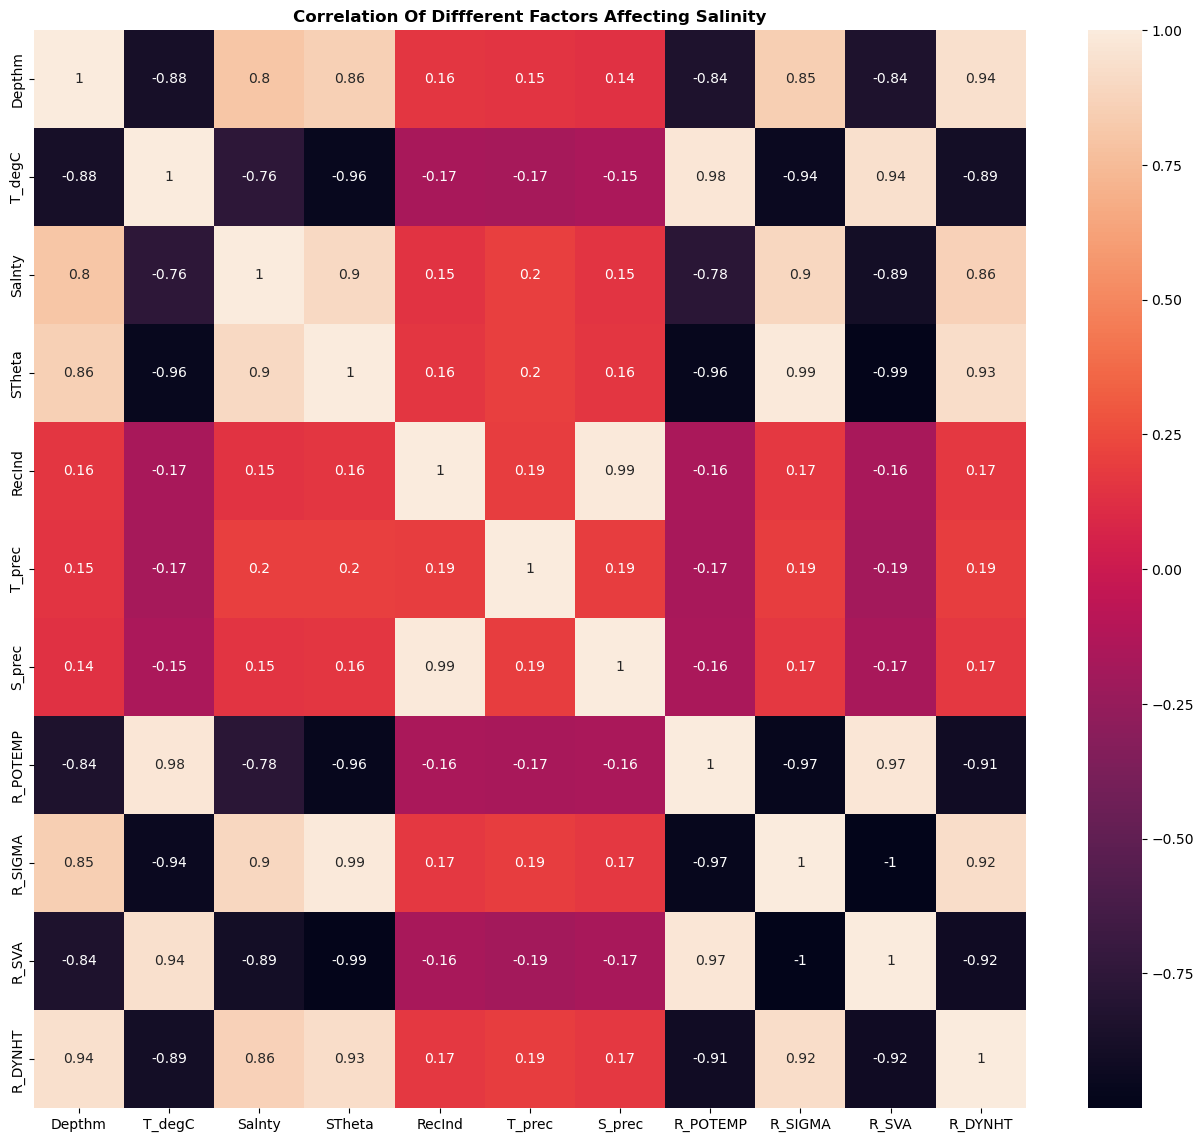

In [27]:
# Ploting a correlation heatmap
corr_matrix
plt.figure(figsize = (16, 14))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Of Diffferent Factors Affecting Salinity', weight='bold')
plt.savefig('output/salinity_correlation.png')
plt.show()

From the above we can conclude:
* A salinity has a higher positive correlation to stheta and depth. Therefore the more the depth the higher the salinity.
* Salinity has a higher negative corelation to Tempereature. The lower the temperature the higher the salinity.

### Model Development

#### Importing the required libraries

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, f1_score

In [32]:
# Split the data into Feature variables and target variable
X = df5.drop('Salnty', axis = 1)
y = df5['Salnty']

print(X.shape, y.shape)

(1500, 10) (1500,)


In [33]:
# Normalizing our Feature Variables
transformer = StandardScaler()
X = transformer.fit_transform(X)

In [34]:
# Creating our Training and Testing data 
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=0)

#### 1. Linear Regression

In [35]:
# Define our model
model = LinearRegression()

#Fit the variables to our model
model.fit(train_x, train_y)

LinearRegression()

In [36]:
# Check the Accuracy of our model with the test samples
print(f' Testing Score: {model.score(test_x, test_y)}')
print(f' Training Score: {model.score(train_x, train_y)}')

 Testing Score: 0.9855472506460551
 Training Score: 0.9862649244235402


In [37]:
# Predict values using our Model
yhat = model.predict(test_x)

Text(0, 0.5, 'Salinity Levels')

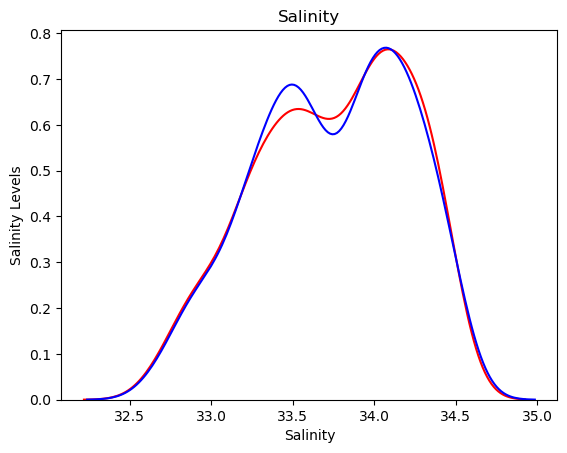

In [38]:
# Plot a KDE Plot showing the predicted and true values using our testing data
ax1 = sns.kdeplot(test_y, color="r", label="Actual Value")
sns.kdeplot(yhat, color="b", label="Fitted Values" , ax=ax1)

plt.title('Salinity')
plt.xlabel('Salinity')
plt.ylabel('Salinity Levels')

#### Hyperparameter Tuning

In [39]:
#We will check the parameters requires for tuning our model
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [40]:
# Import our optimization models
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

##### 1. Randomized Search CV

In [41]:
params = [{'copy_X': [True, False],
          'fit_intercept': [True, False],
          'n_jobs': [1, 5, 10, 15, None],
          'positive': [True, False]}
         ]
mod = LinearRegression()

random_search = RandomizedSearchCV(estimator = mod, param_distributions=params, n_iter=30, cv=2)

In [42]:
random_search.fit(train_x, train_y)

RandomizedSearchCV(cv=2, estimator=LinearRegression(), n_iter=30,
                   param_distributions=[{'copy_X': [True, False],
                                         'fit_intercept': [True, False],
                                         'n_jobs': [1, 5, 10, 15, None],
                                         'positive': [True, False]}])

In [44]:
print(f'Best score: {(random_search.best_score_)*100:.3f}%')
print(f'Best parameters for our model: {random_search.best_params_}')

Best score: 98.323%
Best parameters for our model: {'positive': False, 'n_jobs': 10, 'fit_intercept': True, 'copy_X': True}


In [46]:
rcv_score = random_search.score(test_x, test_y)
print(f'The Accuracy score of our randomizedsearchcv on our testing data: {rcv_score*100:.2f}%')

The Accuracy score of our randomizedsearchcv on our testing data: 98.55%


In [53]:
rcv2_score = random_search.score(train_x, train_y)
print(f'The Accuracy score of our randomizedsearchcv on our training data: {rcv2_score*100:.2f}%')

The Accuracy score of our randomizedsearchcv on our training data: 98.63%


##### 2. Grid Search CV

In [48]:
grid_search = GridSearchCV(estimator=mod, param_grid=params, cv = 2)

In [49]:
grid_search.fit(train_x, train_y)

GridSearchCV(cv=2, estimator=LinearRegression(),
             param_grid=[{'copy_X': [True, False],
                          'fit_intercept': [True, False],
                          'n_jobs': [1, 5, 10, 15, None],
                          'positive': [True, False]}])

In [50]:
print(f'Best score: {(grid_search.best_score_)*100:.3f}%')
print(f'Best Parameters: {grid_search.best_params_}')

Best score: 98.323%
Best Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}


In [51]:
gr_score = grid_search.score(test_x, test_y)
print(f'The best score for our grid search on our test data is: {gr_score*100:.2f}')

The best score for our grid search on our test data is: 98.55


In [55]:
yhat2 = random_search.predict(test_x)
yhat3 = grid_search.predict(test_x)

In [56]:
# Getting the Mean Squared Error
mse1 = np.mean((test_y-yhat2)**2)
print(f'Mean Squared Error: {mse1}')

Mean Squared Error: 0.0031211737545335724


From the above scores both Random search CSV and GridSearchCV have the same accuracy score.

### 2. Lasso Regression
Here we shall try using a Lasso Regression to compare how well our model performs. Lasso Regression applies a penalty to the coefficients to prevent overfitting. It performs an L1 regularization optimizing the performance of our model more on Lasso regression can be found in the [link](https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/)

In [93]:
from sklearn.linear_model import Lasso

In [94]:
lasso_reg = Lasso()
lasso_reg.fit(train_x, train_y)

Lasso()

In [95]:
lasso_reg.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [96]:
lasso_reg.score(test_x, test_y)

-4.605544265956496e-07

#### Tuning our Lasso model using RandomSearchCv

In [97]:
params2 = [{'alpha': [0.001, 0.1, 1, 10],
 'copy_X': [True, False],
 'fit_intercept': [True, False],
 'max_iter': [100, 500, 1000, 5000] ,
 'positive': [True, False],
 'precompute': [True, False],
 'random_state': [1, 5, 10, 15, None],
 'selection': ['cyclic', 'random'],
 'tol': [0.01, 0.001, 0.0001, 0.00001],
 'warm_start': [True, False]}]

In [127]:
rand_l = RandomizedSearchCV(estimator=lasso_reg, param_distributions=params2, n_iter=600, cv=10)

In [128]:
rand_l.fit(train_x, train_y)

C:\Users\Carlt\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 126509.80908692104, tolerance: 1075.958873846801
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Carlt\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 183528.44450638694, tolerance: 1075.958873846801
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Carlt\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5447029951390108, tolerance: 0.002221797799446316
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Carlt\AppData\Roaming\

RandomizedSearchCV(cv=10, estimator=Lasso(), n_iter=600,
                   param_distributions=[{'alpha': [0.001, 0.1, 1, 10],
                                         'copy_X': [True, False],
                                         'fit_intercept': [True, False],
                                         'max_iter': [100, 500, 1000, 5000],
                                         'positive': [True, False],
                                         'precompute': [True, False],
                                         'random_state': [1, 5, 10, 15, None],
                                         'selection': ['cyclic', 'random'],
                                         'tol': [0.01, 0.001, 0.0001, 1e-05],
                                         'warm_start': [True, False]}])

In [129]:
print(f' Bets parameters: {rand_l.best_params_}')
print(f'Best Score: {rand_l.best_score_ * 100:.3f}%')

 Bets parameters: {'warm_start': False, 'tol': 1e-05, 'selection': 'random', 'random_state': 10, 'precompute': False, 'positive': False, 'max_iter': 5000, 'fit_intercept': True, 'copy_X': False, 'alpha': 0.001}
Best Score: 98.152%


In [130]:
y_pred = rand_l.predict(test_x)
mse2 = np.mean((test_y-y_pred)**2)
print(f'Mean Squared Error: {mse2}')

Mean Squared Error: 0.00382936178741964


### 3. Ridge Regression
Ridge Regression is a regularization model that also works towards reducing overfitting. It applies a L2 penalty to the coefficients reducing the effect of overfitting. More on Ridge Regression can be read at [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/)

In [116]:
from sklearn.linear_model import Ridge

In [117]:
ridge = Ridge()
ridge.fit(train_x, train_y)
ridge.score(test_x, test_y)

0.9850323633120455

In [118]:
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

#### Tuning the hyper parameters

In [119]:
params3 = [{'alpha': [0.001, 0.1, 1, 10],
 'copy_X': [True, False],
 'fit_intercept': [True, False],
 'max_iter': [None, 100, 1000, 10000, 15000],
 'positive': [True, False],
 'random_state': [1, 5, 10, 15, None],
 'solver':['auto', 'sag', 'saga', 'lbfgs'], 
 'tol': [0.01, 0.001, 0.0001, 0.00001]
}]

In [122]:
rand_r = RandomizedSearchCV(estimator=ridge, param_distributions=params3, n_iter= 600, cv = 10)

In [124]:
rand_r.fit(train_x, train_y)

C:\Users\Carlt\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Carlt\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Carlt\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Carlt\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Carlt\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Carlt\

RandomizedSearchCV(cv=10, estimator=Ridge(), n_iter=600,
                   param_distributions=[{'alpha': [0.001, 0.1, 1, 10],
                                         'copy_X': [True, False],
                                         'fit_intercept': [True, False],
                                         'max_iter': [None, 100, 1000, 10000,
                                                      15000],
                                         'positive': [True, False],
                                         'random_state': [1, 5, 10, 15, None],
                                         'solver': ['auto', 'sag', 'saga',
                                                    'lbfgs'],
                                         'tol': [0.01, 0.001, 0.0001, 1e-05]}])

In [125]:
print(f' Bets parameters: {rand_r.best_params_}')
print(f'Best Score: {rand_r.best_score_ * 100:.3f}%')

 Bets parameters: {'tol': 0.01, 'solver': 'auto', 'random_state': None, 'positive': False, 'max_iter': 10000, 'fit_intercept': True, 'copy_X': True, 'alpha': 0.001}
Best Score: 98.429%


In [131]:
y_pred2 = rand_r.predict(test_x)
mse3 = np.mean((test_y-y_pred)**2)
print(f'Mean Squared Error: {mse3}')

Mean Squared Error: 0.00382936178741964


In [132]:
results = pd.DataFrame({'Accuracy Score' : [random_search.best_score_, rand_l.best_score_, rand_r.best_score_],
                       'Mean Square Error': [mse1, mse2, mse3]}, index = ['Linear Model', 'Lasso Model', 'Ridge Model'])
results

,Accuracy Score,Mean Square Error
Linear Model,0.983232,0.003121
Lasso Model,0.981518,0.003829
Ridge Model,0.984288,0.003829


From the above it can be observed that all 3 models perform almost the same after tuning the parameters for optimization. The Linear model however, has the least Mean Squared Error error.